In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


http://genome.cshlp.org/content/27/12/2108.long
> aligned to the ce10 version of the C. elegans genome
> 
> Additional analysis files, including DNase I signal data, all DHSs and nearest genes, putative TF footprints, novel motifs, motif-associated genes, and GO analysis, are available from WormBase (detailed list of files in Supplemental Table S3).

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE97425
> GSE97425_embryo.ce10.allDHS.bed.gz

In [2]:
#
#url_ = 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE97nnn/GSE97425/suppl/GSE97425_embryo.ce10.allDHS.bed.gz'
#!cd ~/relmapping/wget; wget -m --no-parent {url_}

fp_ = 'wget/ftp.ncbi.nlm.nih.gov/geo/series/GSE97nnn/GSE97425/suppl/GSE97425_embryo.ce10.allDHS.bed.gz'
df_ = pd.read_csv(fp_, names=['chrom', 'start', 'end', 'score'], sep='\t')
df_ho = df_[['chrom', 'start', 'end']]
df_.head()

,chrom,start,end,score
0,chrI,3900,4050,1391.125000
1,chrI,9740,9890,507.437500
2,chrI,11380,11530,1080.578125
3,chrI,13820,13970,149.218750
4,chrI,16920,17070,164.890625


In [3]:
fp_ = 'annot/Fig2S3_overlaps/Ho2017/Ho2017_DNase_emb.bed'
df_[['chrom', 'start', 'end']].to_csv(fp_, header=False, index=False, sep='\t')
!wc -l {fp_}

41825 annot/Fig2S3_overlaps/Ho2017/Ho2017_DNase_emb.bed


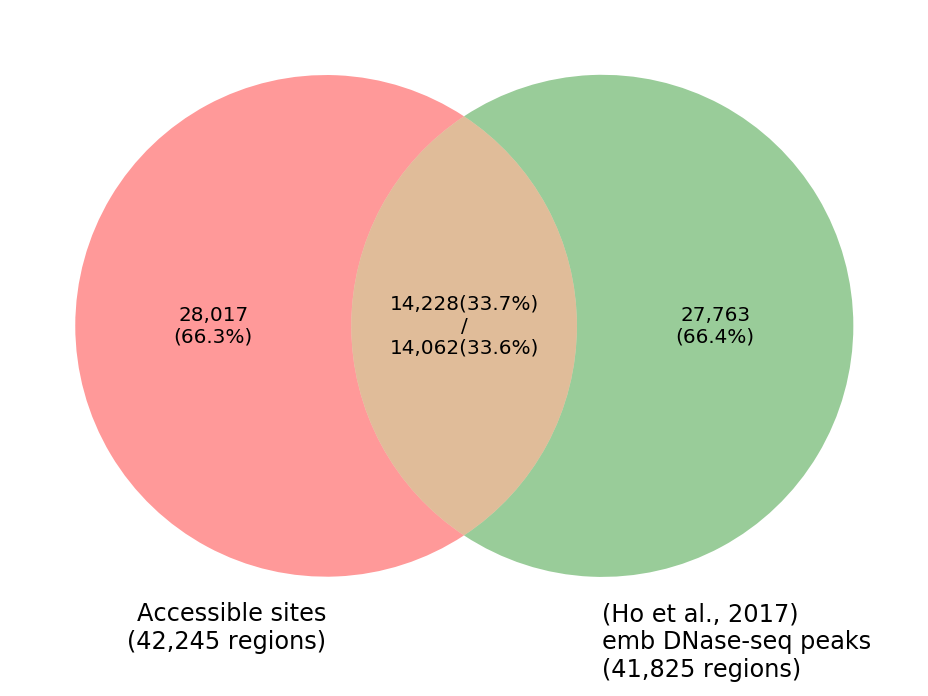

In [4]:
gv = yp.GenomicVenn2(
    BedTool.from_dataframe(regl_mode(flank_len=75)),
    BedTool.from_dataframe(df_ho),
    label_a='Accessible sites',
    label_b='(Ho et al., 2017)\nemb DNase-seq peaks',
)

plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
gv.plot()